# Car Buying Analysis

## by Justin Sierchio

In this analysis, we will be looking at car buying data and discussing trends:

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/brijlaldhankour/car-buyers/download. More information related to the dataset can be found at: https://www.kaggle.com/brijlaldhankour/car-buyers.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_CARBUYERS = pd.read_csv("CarBuyers.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from dataset
df_CARBUYERS.head()

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


## Data Cleaning

Let's begin by looking at the quality of the dataset.

In [4]:
# See if there is any missing data
df_CARBUYERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Transmission  6092 non-null   float64
 4   Power         6092 non-null   float64
 5   Engine CC     6092 non-null   float64
 6   Fuel          6092 non-null   object 
 7   Male          6092 non-null   object 
 8   Female        6092 non-null   object 
 9   Unknown       6092 non-null   object 
 10  Total         6092 non-null   object 
dtypes: float64(4), object(7)
memory usage: 523.7+ KB


We see that the dataset appears to have no incomplete values. Let's check for null values.

In [5]:
# Check for null values
df_CARBUYERS.isnull().sum()

Manufacturer    0
Model           0
Price           0
Transmission    0
Power           0
Engine CC       0
Fuel            0
Male            0
Female          0
Unknown         0
Total           0
dtype: int64

We see that the dataset has no null values.

## Exploratory Data Analysis

Let's begin by looking at the 5 most expensive cars bought.

In [6]:
# Display the 10 most expensive cars bought
df_CARBUYERS_EXPENSE = df_CARBUYERS[['Manufacturer', 'Model', 'Price']]
df_CARBUYERS_EXPENSE.sort_values('Price', ascending = False)
print('Top 10 most expensive cars sold:\n')
df_CARBUYERS_EXPENSE.sort_values('Price', ascending = False)

Top 10 most expensive cars sold:



,Manufacturer,Model,Price
1166,Porsche,Carrera,646.6050
2286,Porsche,Carrera,646.6050
389,Porsche,Carrera,646.6050
2638,Porsche,Carrera,646.6050
5479,Porsche,Carrera,646.6050
...,...,...,...
5786,Skoda,120,3.3322
4947,Skoda,120,3.3322
5377,Skoda,120,3.3322
5583,Skoda,120,3.3322


We can see the most expensive models sold are Porsche Carreras while the cheapest are Skoda 120s.

Let's look at the most popular models sold.

In [7]:
# Display models sold by popularity
df_CARBUYERS['Model'].value_counts()

Space        49
Range        40
CLA          33
2000         31
Cabriolet    26
             ..
Leaf          1
Duster        1
Paceman       1
Orlando       1
John          1
Name: Model, Length: 501, dtype: int64

We see that Spaces and Ranges are the most popular.

Now let's plot the ranges of prices of all the cars.

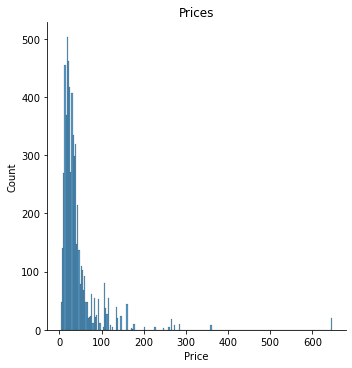

In [8]:
# Plot the range of prices
ax = sns.displot(df_CARBUYERS.Price).set(title='Prices')

We see that the prices (compared to counts) peak around 40.

## Deep-Dive Analysis

Now let's conduct a heatmap analysis to see if there are any hidden trends in the data set.

Text(0.5, 1.0, 'Car Buyers Relationship Matrix')

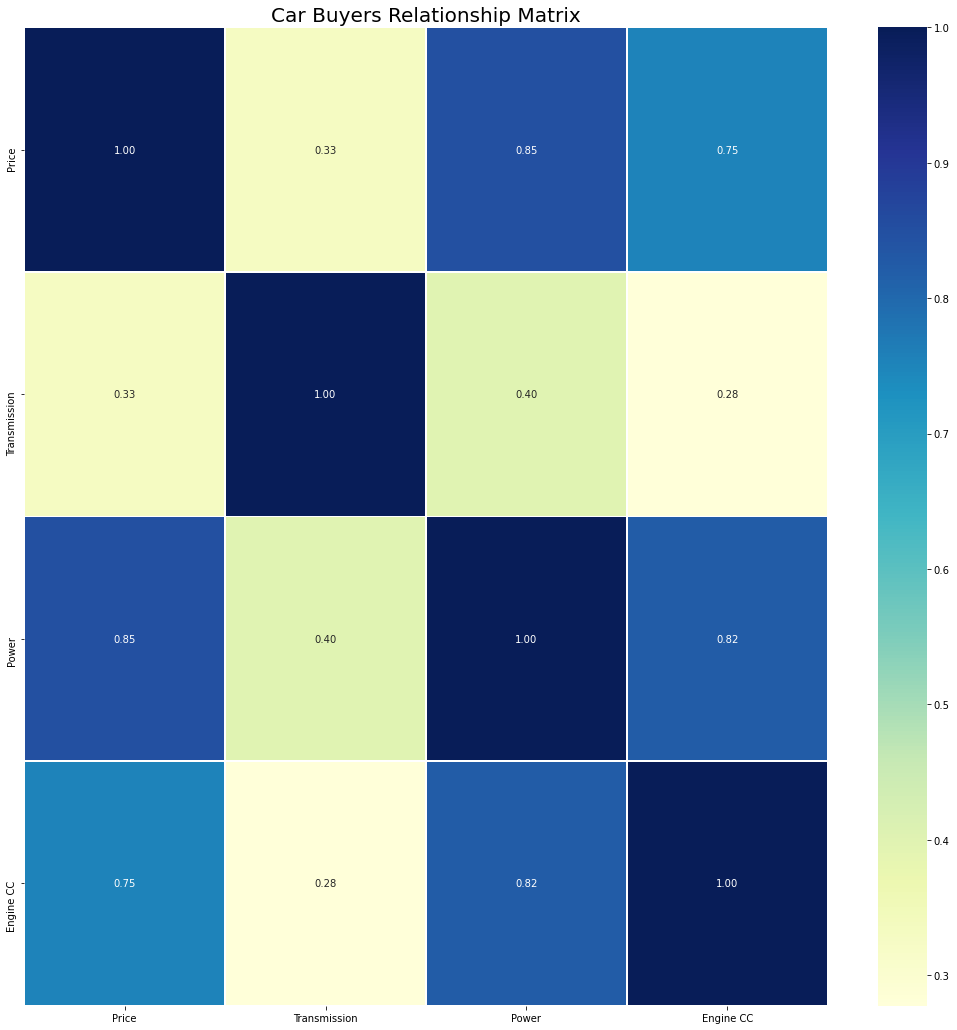

In [10]:
# Car Buying Relationship Matrix
# Select the features to do the analysis
df_CARBUYERS_fs1 = df_CARBUYERS[['Price', 'Transmission','Power', 'Engine CC']]

# Set up the Heatmap
figureQuality, axisQuality = plt.subplots(figsize=(18, 18));
sns.heatmap(df_CARBUYERS_fs1.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisQuality, cmap="YlGnBu");

plt.title('Car Buyers Relationship Matrix', fontsize = 20)

We notice strong relationships between power and price (0.85) as well as engine CC and power (0.82). These observations make sense when one considers the higher power the engine, the more demands it will have hence the higher price.